# Building atomic orbitals

In order to build visual representations of molecular orbitals, atomic orbitals must first be considered. Atomic orbitals are mathematical functions that describe a region of space around a nucleus in which there is a high probability of finding an electron, or a pair of electrons.

Atomic orbitals are described by three quantum numbers[<sup>1</sup>](#fn1): 

Primary quantum number (n) – describes the shell (energy level) that the orbital occupies

Angular momentum quantum number (l) – describes the orbital’s subshell (e.g. s (l = 0), p (l = 1)

Magnetic quantum number (m) – describes a specific orbital within a subshell

## Spherical Harmonics

Spherical harmonics describe the shape of the atomic orbital[<sup>2</sup>](#fn2), and are mathematical functions described by associated Legendre polynomials. Helpfully, scipy (a scientific python library) includes a function to generate spherical harmonics, where l and m are quantum numbers and theta and phi are angles from the polar coordinate system:

    sph_harm(m, l, theta, phi)

To display plots of the spherical harmonics, a lattice of theta and phi values are created, and the spherical harmonic calculated for each value. These are then converted to cartesian coordinates and displayed.

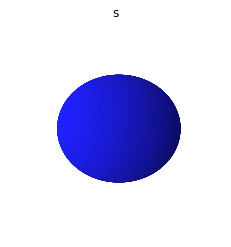

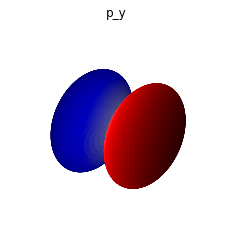

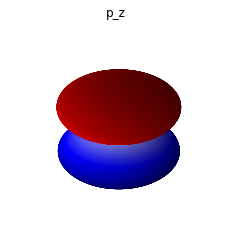

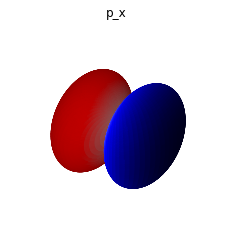

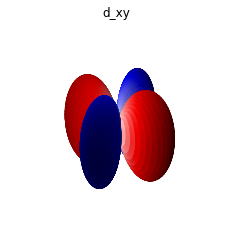

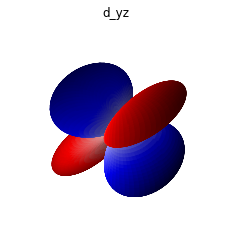

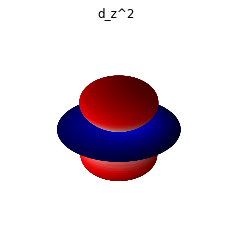

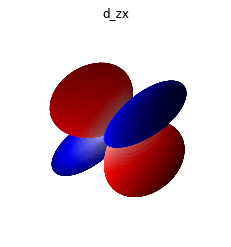

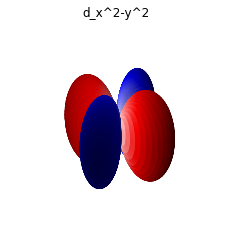

In [3]:
# Spherical Harmonics
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import numpy as np
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D

# Create mesh grid of theta and phi values
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

l = 0
m = 0

label = [['s'],['p_y', 'p_z', 'p_x'],['d_xy', 'd_yz', 'd_z^2', 'd_zx', 'd_x^2-y^2']]

for l in  range ( 0,3 ):
    for m in  range (-l,l+1):
        # Calculate the spherical harmonic and normalize to [0,1]
        harmonic = abs(sph_harm(m, l, theta, phi).real)
        colour = sph_harm(m, l, theta, phi).real

        # Plot a sphere for s orbitals
        if l == 0:
            harmonic = 1

        # Calculate cartesian coordinates
        x = harmonic*np.sin(phi) * np.cos(theta)
        y = harmonic*np.sin(phi) * np.sin(theta)
        z = harmonic*np.cos(phi)
        
        # Colour function
        fmax = colour.max()
        fmin = colour.min()
        if l != 0:
            colour = (colour - fmin)/(fmax - fmin)

        # Set the aspect ratio to 1 
        fig = plt.figure(figsize=plt.figaspect(1.))
        ax = fig.add_subplot(1,1,1, projection='3d')
        ax.set_axis_off()
        ax.title.set_text("{}".format(label[l][m+l]))
        ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(colour))

# Turn off the axis planes
plt.show()

## Radial Distribution Function

The second function important in describing atomic orbitals is the radial distribution function, which is described by Laguerre polynomials[<sup>3</sup>](#fn3). 

To find the radial distribution, we square the result and multiply by $r^2$:

<Figure size 432x288 with 0 Axes>

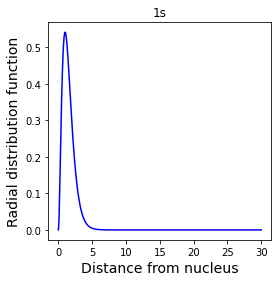

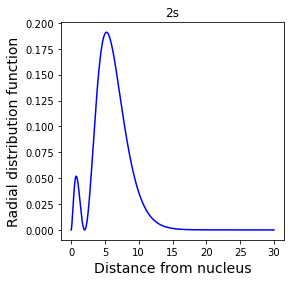

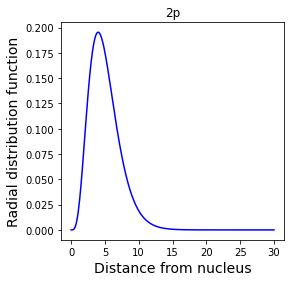

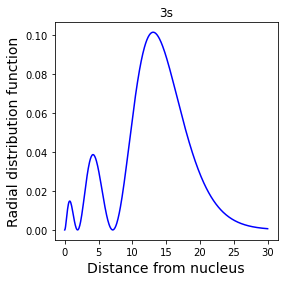

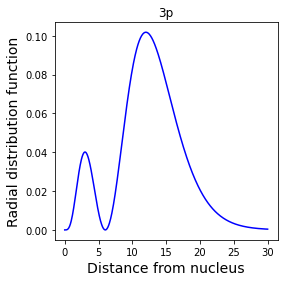

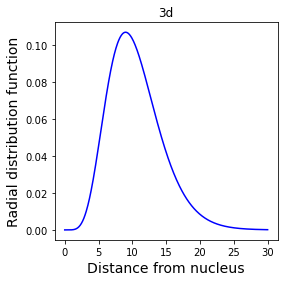

In [4]:
import numpy as np
import matplotlib.pyplot as plt

colour = ['b-']

def  radial_wave_function (r, n, l):
    Z = 1     
    p = Z*r
    rho = 0
    if n == 1  and l == 0 :
        return 2*(Z**1.5)*np.exp(-p)
    elif n == 2  and l == 0 :
         return ((Z/2)**1.5)*(2-p)*np.exp(-p/2)
    elif n == 2  and l == 1:
         return (1/(np.sqrt(3))*((Z/2)**1.5)*p*np.exp(-p/2))
    elif n == 3  and l == 0 :
         return (2/27)*((Z/3)**1.5)*(27-18*p+2*(p**2))*np.exp(-p/3)
    elif n == 3 and l == 1 :
         return (1/27)*((2*Z/3)**1.5)*p*(6-p)*np.exp(-p/3)
    elif n == 3  and l == 2 :
         return (4/(27*np.sqrt(10)))*((Z/3)**1.5)*(p**2)*np.exp(-p/3)
        
# Quantum number setting 
n = 1
l = 0

# Graph drawing 
r = np.linspace ( 0 , 30 , 500 )

h_rad = 31

names = [['1s'], ['2s', '2p'], ['3s', '3p', '3d']]
# a_0 is the Bohr radius of a hydrogen atom
plt.figure ()
#plt.plot (r, 0*radial_wave_function (r, n, l)) 
for n in  range ( 4 ):
     for l in  range (0,n):
            fig = plt.figure (figsize =(4.0, 4.0))
            plt.plot (r, (radial_wave_function (r, n, l)**2 )*(r**2 ), colour[0])   # Radial distribution function 
            plt.xlabel ( 'Distance from nucleus', fontsize = 14)
            plt.ylabel ( 'Radial distribution function', fontsize = 14)
            plt.title(names[n-1][l])
            function = (radial_wave_function(r, n, l)**2)*(r**2)

plt.show ()

With both the spherical harmonics and the radial distribution functions, we can build the atomic orbitals. The wavefunction of an atomic orbital is simply the product of both of these functions.

$$
ψ(r,θ,ϕ) = R(r)Y(θ,ϕ)
$$

<span id="fn1"> 1: Keeler, J. and Wothers, P. (2009). Why chemical reactions happen. Oxford: Oxford University Press </span>

<span id="fn2"> 2: Atkins, P.W. and Julio De Paula (2010). Physical chemistry. 9th ed. New York: W.H. Freeman And Co. </span>

<span id="fn3"> 3: Atkins and Julio De Paula, 2010 </span>